# FAIRe Qualitäts-KPIs
Autor: Harry Kristanto
Datum: 31.10.23

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

1. Wie kann man selbst ein logisches Auto bezüglich FAIRe Qualitäts-KPIs erstellen?
2. Fährt das Auto noch, obwohl es schon die Bedingung von guten FAIRe Qualitäts-KPIs erfüllt hat?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

In meiner Vorstellung würde ich ein einfaches, stabiles 4 Räder-Fahrzeug erstellen. Es sollte fähig sein, um eine Bewegung von einer Richtung (geradeaus) betrieben zu werden.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![legocar.jpg](work/quality-kpi-prakdig-hk/figures/legocar.jpg)
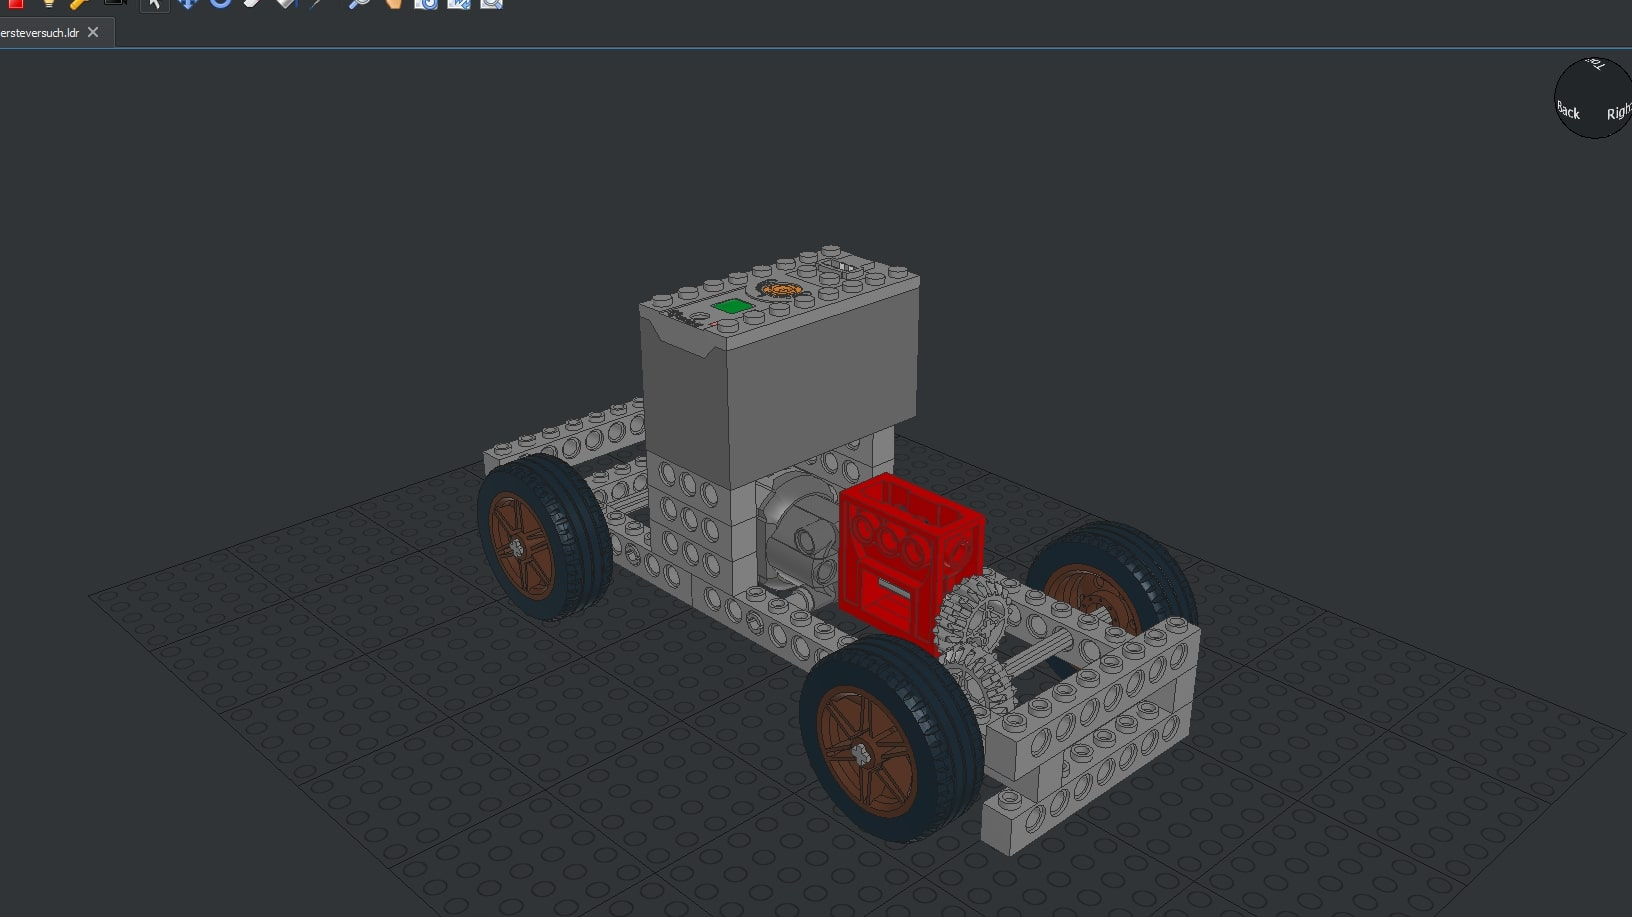

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Mein Fahrzeug besteht aus 4 brownfarbigen Rädern. 2 Vorderräder sind mit einer Achse verbunden, das Gleiche gilt auch für die Hinterräder. Ein Motor und Gearbox stehen in der Mitte bis Vorne. Die beiden sind mit dem Frame durch 4 Pin Frames gebunden. Das Akku steht auf dem Motor, indem es auf Klötzen in beiden Endseiten sitzt. Das Fahrzeug ist ein 2-Wheeldrive, also das Getribe betreibt die Vorderachse, also es bewegt die 2 Vorderräder.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [14]:
import json
import pprint
from functions import calculation_rules

from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree

In [15]:
# initialize components
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
print(axles["3708"])
# Front axle
front_axle = LegoComponent("front axle", axles["3708"])
print(front_axle.properties["label"])

# Back axle
back_axle = LegoComponent()
back_axle.properties["label"] = "back axle"
back_axle.properties.update(axles["3708"])

# Gearbox axle
gearbox_axle = LegoComponent()
gearbox_axle.properties["label"] = "gearbox axle"
gearbox_axle.properties.update(axles["3737"])

pprint.pprint(front_axle.properties)
pprint.pprint(back_axle.properties)
pprint.pprint(gearbox_axle.properties)

{'item number': 3708, 'item description': 'Axle 12 studs', 'category': 'axle', 'price [Euro]': 0.02, 'mass [g]': 1.82, 'delivery time [days]': 7, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3708#T=S&O={%22iconly%22:0}', 'dimension [studs]': 12}
front axle
{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3708#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 7,
 'dimension [studs]': 12,
 'item description': 'Axle 12 studs',
 'item number': 3708,
 'label': 'front axle',
 'mass [g]': 1.82,
 'price [Euro]': 0.02}
{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3708#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 7,
 'dimension [studs]': 12,
 'item description': 'Axle 12 studs',
 'item number': 3708,
 'label': 'back axle',
 'mass [g]': 1.82,
 'price [Euro]': 0.02}
{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3737#T=S&O={%22

In [16]:
# Create the wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

front_wheel_1 = LegoComponent(
    "front wheel left", wheels["56904c02"], color="brown", surface="rough", paint="glossy"
)

front_wheel_2 = front_wheel_1.clone("front wheel right")
back_wheel_1 = front_wheel_1.clone("back wheel left")
back_wheel_2 = front_wheel_1.clone("back wheel right")

pprint.pprint(front_wheel_1.properties)
pprint.pprint(front_wheel_2.properties)
pprint.pprint(back_wheel_1.properties)
pprint.pprint(back_wheel_2.properties)

{'category': 'wheel',
 'color': 'brown',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=56904c02#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 43.2,
 'item description': 'wheel 43,2',
 'item number': '56904c02',
 'label': 'front wheel left',
 'mass [g]': 13.0,
 'paint': 'glossy',
 'price [Euro]': 0.11,
 'related items': 30699,
 'surface': 'rough'}
{'category': 'wheel',
 'color': 'brown',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=56904c02#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 43.2,
 'item description': 'wheel 43,2',
 'item number': '56904c02',
 'label': 'front wheel right',
 'mass [g]': 13.0,
 'paint': 'glossy',
 'price [Euro]': 0.11,
 'related items': 30699,
 'surface': 'rough'}
{'category': 'wheel',
 'color': 'brown',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=56904c02#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 43.2,
 'item description': 'wheel 43,2',
 'item number': '56

In [17]:
# Create the battery
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
print(batteries["8878-1"])
    
battery = LegoComponent()
battery.properties["label"] = "battery"


{'item number': '8878-1', 'item description': 'Power Functions Rechargeable Battery Box', 'category': 'battery', 'price [Euro]': 55, 'mass [g]': 83.94, 'delivery time [days]': 8, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=8878-1#T=S&O={%22iconly%22:0}', 'output voltage [V]': 7.4, 'dimensions [cm]': '15 x 15 x 3,5'}


In [18]:
# Create the motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
print(motors["88003-1"])
    
motor = LegoComponent()
motor.properties["label"] = "motor"

pprint.pprint(motor.properties)

{'item number': '88003-1', 'item description': 'Power Functions L-Motor', 'category': 'motor', 'related items': '8881, 8878, 88000', 'idle current [mA]': 120, 'idle speed [rev per min]': 390, 'locking torque [Ncm]': 18, 'price [Euro]': 15, 'mass [g]': 48.0, 'delivery time [days]': 3, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=88003-1&name=Power%20Functions%20L-Motor&category=%5BPower%20Functions%5D#T=S&O={%22iconly%22:0}', 'compatible battery': '8881, 8878, 88000', 'input voltage [V]': 9, 'dimensions [cm]': '13 x 11 x 2.5'}
{'label': 'motor'}


In [19]:
# Create the gearbox and gears
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
print(gears["6588"])

# The gearbox
gearbox = LegoComponent()
gearbox.properties["label"] = "gearbox"
gearbox.properties["color"] = "red"

# Gears (2 Gears)
gear1 = LegoComponent()
gear1.properties["label"] = "gear 1"
gear1.properties.update(gears["32269"])

gear2 = gear1.clone("gear 2")

pprint.pprint(gearbox.properties)
pprint.pprint(gear1.properties)

{'item number': 6588, 'item description': 'Gear Worm Gearbox', 'category': 'gear', 'price [Euro]': 1.63, 'mass [g]': 4.5, 'delivery time [days]': 11, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=6588#T=C'}
{'color': 'red', 'label': 'gearbox'}
{'category': 'gear',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32269#T=C',
 'delivery time [days]': 13,
 'item description': 'Gear 20 Tooth',
 'item number': 32269,
 'label': 'gear 1',
 'mass [g]': 1.4,
 'price [Euro]': 0.36}


In [20]:
# Create the lego frames
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
print(frame["32018"])

# The main frames
frame1 = LegoComponent()
frame1.properties["label"] = "frame left"

frame2 = frame1.clone("frame right")

pprint.pprint(frame1.properties)

# The connecting frames
framec1 = LegoComponent()
framec1.properties["label"] = "connecting frame left"
framec1.properties.update(frame["2730"])

framec2 = framec1.clone("connecting frame right")

pprint.pprint(framec1.properties)

# The front and back frames
framef1 = LegoComponent()
framef1.properties["label"] = "front frame 1"
framef1.properties.update(frame["3702"])

framef2 = framef1.clone("front frame 2")
frameb1 = framef1.clone("back frame 1")
frameb2 = framef1.clone("back frame 2")

pprint.pprint(framef1.properties)

# The platform frames
framepl1 = LegoComponent()
framepl1.properties["label"] = "left platform frame 1"
framepl1.properties.update(frame["3701"])

framepl2 = framepl1.clone("left platform frame 2")
framepl3 = framepl1.clone("left platform frame 3")
framepr1 = framepl1.clone("right platform frame 1")
framepr2 = framepl2.clone("right platform frame 2")
framepr3 = framepl3.clone("right platform frame 3")

pprint.pprint(framepl1.properties)

# The pin frames
pinl1 = LegoComponent()
pinl1.properties["label"] = "left pin frame 1"
pinl1.properties.update(frame["32556"])

pinl2 = pinl1.clone("left pin frame 2")
pinr1 = pinl1.clone("right pin frame 1")
pinr2 = pinl1.clone("right pin frame 2")

pprint.pprint(pinl1.properties)

{'item number': 32018, 'item description': 'Technic, Brick 1 x 14 with Holes', 'category': 'frame', 'price [Euro]': 0.03, 'mass [g]': 4.92, 'delivery time [days]': 5, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32018#T=C', 'dimension [studs]': '1 x 14 x 1'}
{'label': 'frame left'}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=2730#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 10 x 1',
 'item description': 'Technic, Brick 1 x 10 with Holes',
 'item number': 2730,
 'label': 'connecting frame left',
 'mass [g]': 3.67,
 'price [Euro]': 0.01}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3702#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 8 x 1',
 'item description': 'Technic, Brick 1 x 8 with Holes',
 'item number': 3702,
 'label': 'front frame 1',
 'mass [g]': 2.85,
 'price [Euro]': 0.01}
{'category': 'frame',
 'data source': 'https://w

In [ ]:
# set properties

In [36]:
# Aggregate components
# Front wheels
front_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheel assembly",
    assembly_method="stick together like lego wheels",
)
front_wheel_assembly.add([front_wheel_1, front_wheel_2,front_axle])

# Back wheels
back_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel assembly"
    )
back_wheel_assembly.add([back_wheel_1, back_wheel_2,back_axle])  
    
# Engine (Motor, gears and gearbox)
engine = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "engine assembly",
    assembly_method="stick together like lego blocks",
)
engine.add([motor, gearbox, gear1, gear2, gearbox_axle])
    
#Frames
car_frame = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "car frame assembly",
    assembly_method="stick together like lego blocks",
)
car_frame.add([frame1, frame2, framec1, framec2, framef1, framef2, frameb1, frameb2, 
          framepl1, framepl2, framepl3, framepr1, framepr2, framepr3, pinl1, pinl2,
          pinr1, pinr2])

In [37]:
#Assembly
legocar = LegoAssembly(
    AggregationLayer.SYSTEM,
    "legocar",
    manufacturer="Harry Kristanto",
    comment="schnell wie Max Verstappen",
)

legocar.add([front_wheel_assembly, back_wheel_assembly, engine, car_frame, battery])

In [38]:
print(legocar.get_component_list(max_depth=0))
print(legocar.get_component_list())

[LegoComponent battery [e42ad69c-7c38-4d22-9a7c-d5fd9db37db1]]
[LegoComponent battery [e42ad69c-7c38-4d22-9a7c-d5fd9db37db1], LegoComponent front wheel left [078b3fa5-a01a-4c64-9de4-7bb79bc86d10], LegoComponent front wheel right [ba3639dc-e0be-44db-a05f-66420695082b], LegoComponent front axle [605f4763-5236-43f1-8aae-0fa128be4cfc], LegoComponent back wheel left [776b581d-04e2-47d7-931e-829bbcb7ac14], LegoComponent back wheel right [28d3a54f-1a72-4732-8310-9481eb415cc2], LegoComponent back axle [f49f05a3-a100-40d7-b2d7-a49efcd58f13], LegoComponent motor [f6f2d9f4-66fe-459a-bdbc-26777f6a7d43], LegoComponent gearbox [d1e382be-bdea-4a06-b489-f5d692476445], LegoComponent gear 1 [a2c3a06d-e9d1-477d-818b-b578406a0ad9], LegoComponent gear 2 [eaa44ef9-950d-437c-9729-34aa9e8d04a8], LegoComponent gearbox axle [43d179bf-838f-4949-b1c1-53a12069b923], LegoComponent frame left [650b4fef-b026-4406-8f37-53809861da8b], LegoComponent frame right [b6751472-18c1-4b3a-b534-15df55876280], LegoComponent conne

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

KPIs 
Gesamtmasse (mass [g])
Gesamtkosten (price [Euro])
Lieferzeit (delivery time [days])

Generell, jede Teile haben ihre eigene Masse, Kosten, und Lieferzeit. 
Gesamtmasse und Gesamtkosten haben die gleiche Berechnungsvorschrift. 

Aber Lieferzeit ist ein bisschen anders, weil man nicht braucht die verschiedenen Lieferzeiten summieren. Man kann bei Lieferung quasi viele oder sogar alle Teilen aber nur auf einmal bestellen. Bei Lieferzeiten, man sollte nur auf die längste Lieferzeit von einem Teil achten.

Man sollte die Gesamte von allem berechen, indem man jede eingene Masse und Kosten von den Teilen summieren.

Ein möglicher KPI ist Kosten pro Masse. Es wird einfach berechnet, indem man die Gesamtkosten durch die Gesamtmasse des Fahrzeugs teilt. Durch die Berechnung dieses KPIs kann man eine gute Kennzeichnung, die Ihnen hilft, die Effizienz der Ressourcennutzung während des Herstellungsprozesses zu bewerten. Damit kann man die Kosteneigentschaften des Fahrzeugs Vergleich zu ähnlichen Modellen auf dem Markt besser verstehen.

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [39]:
# KPI Calculation
calculation_rules.test_function()
total_mass = calculation_rules.kpi_mass(legocar)

print("Gesamtmasse: ", total_mass, "g")
# Add KPI to system
legocar.properties["mass [g]"] = total_mass

#Mit dem gegebenen Code in calculation_rules.py funktioniert es leider nicht, 
#um die gesamte Masse zu rechnen.

You called the test function.


KeyError: 'mass [g]'

In [41]:
# print your KPIs
legocar.get_component_list(-1)
print_assembly_tree(legocar)

LegoAssembly legocar [57d7365a-5e97-48b0-b903-c0835c2ba43b]
├── LegoAssembly front wheel assembly [6dd92dac-aee9-45dd-a6ad-55ae21a2e143]
│   ├── LegoComponent front wheel left [078b3fa5-a01a-4c64-9de4-7bb79bc86d10]
│   ├── LegoComponent front wheel right [ba3639dc-e0be-44db-a05f-66420695082b]
│   └── LegoComponent front axle [605f4763-5236-43f1-8aae-0fa128be4cfc]
├── LegoAssembly back wheel assembly [a552d661-7c97-4d72-a585-ad5115c572ea]
│   ├── LegoComponent back wheel left [776b581d-04e2-47d7-931e-829bbcb7ac14]
│   ├── LegoComponent back wheel right [28d3a54f-1a72-4732-8310-9481eb415cc2]
│   └── LegoComponent back axle [f49f05a3-a100-40d7-b2d7-a49efcd58f13]
├── LegoAssembly engine assembly [c3d981b0-f4b3-4248-a355-c320385494b6]
│   ├── LegoComponent motor [f6f2d9f4-66fe-459a-bdbc-26777f6a7d43]
│   ├── LegoComponent gearbox [d1e382be-bdea-4a06-b489-f5d692476445]
│   ├── LegoComponent gear 1 [a2c3a06d-e9d1-477d-818b-b578406a0ad9]
│   ├── LegoComponent gear 2 [eaa44ef9-950d-437c-9729-34

Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [42]:
# export car and its properties
with open("legocar.json", "w") as fp:
    json.dump(legocar.to_dict(), fp, cls=KPIEncoder, indent=4)s

SyntaxError: invalid syntax (<ipython-input-42-eac5f746db8e>, line 3)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:


Ziele sind :
1. Die Gewichtverteilung zu verbessern
2. Alle möglich bei Bewegung verschiebbare Teile verfestigen

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

[legocar2.jpg](work/quality-kpi-prakdig-hk/figures/legocar2.jpg)
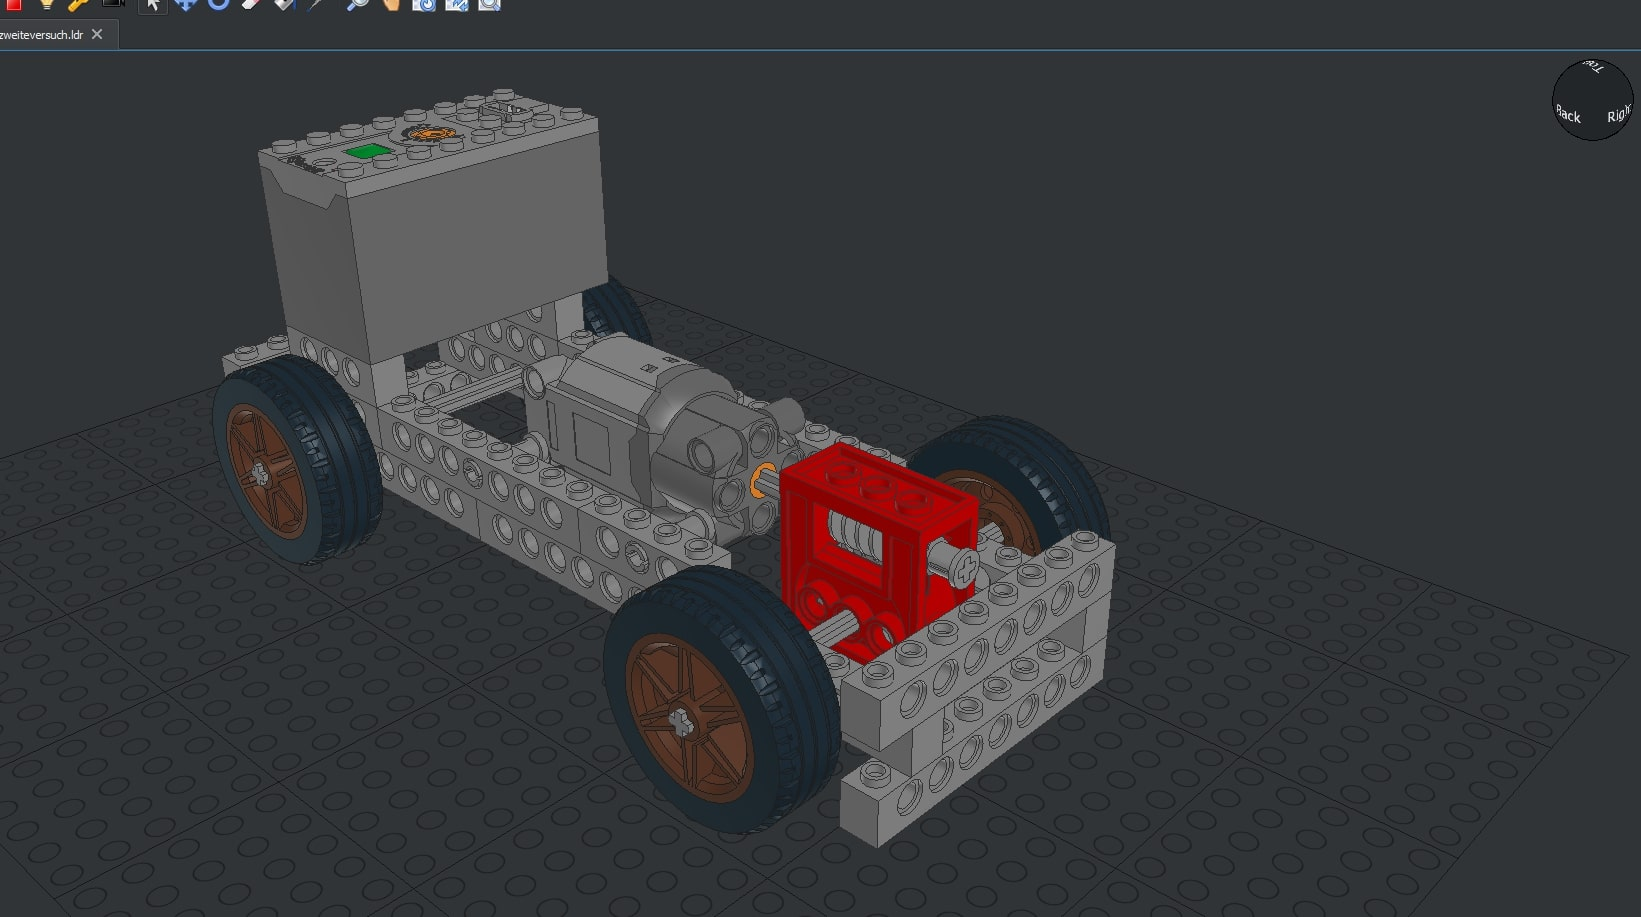

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Im Vergleich zu dem ersten Fahrzeug ist das zweite Fahrzeug stabiler und fester. Der Akku wird nach ganz hinten gelegt. Der Motor und das Getriebe werden besser mit dem Frame verfestigt. Plus, ist das Getriebe jetzt richt gebaut. Somit hat das Fahrzeug eine bessere Balance.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [ ]:
# initialize components
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
print(axles["3708"])
# Front axle
front_axle = LegoComponent("front axle", axles["3708"])
print(front_axle.properties["label"])

# Back axle
back_axle = LegoComponent()
back_axle.properties["label"] = "back axle"
back_axle.properties.update(axles["3708"])

# Gearbox axle
gearbox_axle = LegoComponent()
gearbox_axle.properties["label"] = "gearbox axle"
gearbox_axle.properties.update(axles["3737"])

pprint.pprint(front_axle.properties)
pprint.pprint(back_axle.properties)
pprint.pprint(gearbox_axle.properties)

In [ ]:
# Create the wheels
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

front_wheel_1 = LegoComponent(
    "front wheel left", wheels["56904c02"], color="brown", surface="rough", paint="glossy"
)

front_wheel_2 = front_wheel_1.clone("front wheel right")
back_wheel_1 = front_wheel_1.clone("back wheel left")
back_wheel_2 = front_wheel_1.clone("back wheel right")

pprint.pprint(front_wheel_1.properties)
pprint.pprint(front_wheel_2.properties)
pprint.pprint(back_wheel_1.properties)
pprint.pprint(back_wheel_2.properties)

In [ ]:
# Create the battery
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
print(batteries["8878-1"])
    
battery = LegoComponent()
battery.properties["label"] = "battery"

In [ ]:
# Create the motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
print(motors["88003-1"])
    
motor = LegoComponent()
motor.properties["label"] = "motor"

pprint.pprint(motor.properties)

In [29]:
# Create the gearbox and gears
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
print(gears["6588"])

# The gearbox
gearbox = LegoComponent()
gearbox.properties["label"] = "gearbox"
gearbox.properties["color"] = "red"

# Gear
gear = LegoComponent()
gear.properties["label"] = "gear"
gear.properties.update(gears["3648"])

# Worm gear
wormgear = LegoComponent()
wormgear.properties["label"] = "worm gear"
wormgear.properties.update(gears["4716"])

pprint.pprint(gearbox.properties)
pprint.pprint(gear.properties)
pprint.pprint(wormgear.properties)

{'item number': 6588, 'item description': 'Gear Worm Gearbox', 'category': 'gear', 'price [Euro]': 1.63, 'mass [g]': 4.5, 'delivery time [days]': 11, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=6588#T=C'}
{'color': 'red', 'label': 'gearbox'}
{'category': 'gear',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3648#T=C',
 'delivery time [days]': 11,
 'item description': 'Gear 24 Tooth',
 'item number': 3648,
 'label': 'gear',
 'mass [g]': 1.17,
 'price [Euro]': 0.32}
{'category': 'gear',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=4716#T=C',
 'delivery time [days]': 12,
 'item description': 'Gear Worm Screw',
 'item number': 4716,
 'label': 'worm gear',
 'mass [g]': 0.6,
 'price [Euro]': 0.54}


In [28]:
# Create the lego frames
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
print(frame["32018"])

# The main frames
frame1 = LegoComponent()
frame1.properties["label"] = "frame left"

frame2 = frame1.clone("frame right")

pprint.pprint(frame1.properties)

# The connecting frames
framec1 = LegoComponent()
framec1.properties["label"] = "connecting frame left"
framec1.properties.update(frame["3702"])

framec2 = framec1.clone("connecting frame right")

pprint.pprint(framec1.properties)

# The front and back frames
framef1 = LegoComponent()
framef1.properties["label"] = "front frame 1"
framef1.properties.update(frame["3702"])

framef2 = framef1.clone("front frame 2")
frameb1 = framef1.clone("back frame 1")
frameb2 = framef1.clone("back frame 2")

pprint.pprint(framef1.properties)

# The platform frames
framepl1 = LegoComponent()
framepl1.properties["label"] = "left platform frame 1"
framepl1.properties.update(frame["3701"])

framepl2 = framepl1.clone("left platform frame 2")
framepl3 = framepl1.clone("left platform frame 3")
framepl4 = framepl1.clone("left platform frame 4")
framepr1 = framepl1.clone("right platform frame 1")
framepr2 = framepl2.clone("right platform frame 2")
framepr3 = framepl3.clone("right platform frame 3")
framepr4 = framepl3.clone("right platform frame 4")

pprint.pprint(framepl1.properties)

# The pin frames
pinl1 = LegoComponent()
pinl1.properties["label"] = "left pin frame 1"
pinl1.properties.update(frame["32556"])

pinl2 = pinl1.clone("left pin frame 2")
pinr1 = pinl1.clone("right pin frame 1")
pinr2 = pinl1.clone("right pin frame 2")

pprint.pprint(pinl1.properties)

# Bush (2 bushes)
bush1 = LegoComponent()
bush1.properties["label"] = "bush 1"
bush1.properties.update(frame["3713"])

bush2 = bush1.clone("bush 2")

pprint.pprint(bush1.properties)

{'item number': 32018, 'item description': 'Technic, Brick 1 x 14 with Holes', 'category': 'frame', 'price [Euro]': 0.03, 'mass [g]': 4.92, 'delivery time [days]': 5, 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32018#T=C', 'dimension [studs]': '1 x 14 x 1'}
{'label': 'frame left'}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3702#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 8 x 1',
 'item description': 'Technic, Brick 1 x 8 with Holes',
 'item number': 3702,
 'label': 'connecting frame left',
 'mass [g]': 2.85,
 'price [Euro]': 0.01}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3702#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 8 x 1',
 'item description': 'Technic, Brick 1 x 8 with Holes',
 'item number': 3702,
 'label': 'front frame 1',
 'mass [g]': 2.85,
 'price [Euro]': 0.01}
{'category': 'frame',
 'data source': 'https://www

In [ ]:
# set properties

In [30]:
# aggregate components
# Front wheels
front_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front wheel assembly",
    assembly_method="stick together like lego wheels",
)
front_wheel_assembly.add([front_wheel_1, front_wheel_2,front_axle])

# Back wheels
back_wheel_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, "back wheel assembly"
    )
back_wheel_assembly.add([back_wheel_1, back_wheel_2,back_axle])  
    
# Engine (Motor, gears and gearbox)
engine = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "engine assembly",
    assembly_method="stick together like lego blocks",
)
engine.add([motor, gearbox, gear, wormgear, gearbox_axle])
    
#Frames
car_frame = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "car frame assembly",
    assembly_method="stick together like lego blocks",
)
car_frame.add([frame1, frame2, framec1, framec2, framef1, framef2, frameb1,
               frameb2, bush1, bush2, framepl1, framepl2, framepl3, framepl4,
               framepr1, framepr2, framepr3, framepr4, pinl1, pinl2, pinr1,
               pinr2])

In [34]:
#Assembly
legocar2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "legocar 2",
    manufacturer="Harry Kristanto",
    comment="schnell wie Max Verstappen",
)

legocar2.add([front_wheel_assembly, back_wheel_assembly, engine, car_frame, battery])

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [35]:
# KPI Calculation
calculation_rules.test_function()
total_mass = calculation_rules.kpi_mass(legocar2)

print("Gesamtmasse: ", total_mass, "g")
# Add KPI to system
legocar2.properties["mass [g]"] = total_mass

#Mit dem gegebenen Code in calculation_rules.py funktioniert es leider nicht, 
#um die gesamte Masse zu rechnen.r

You called the test function.


KeyError: 'mass [g]'

In [44]:
# print your KPIs
legocar2.get_component_list(-1)
print_assembly_tree(legocar2)

LegoAssembly legocar 2 [f10b71e6-dec0-4549-97cd-ba987095ac71]
├── LegoAssembly front wheel assembly [9b6445e1-404b-46bd-8c94-f3704068cfdc]
│   ├── LegoComponent front wheel left [078b3fa5-a01a-4c64-9de4-7bb79bc86d10]
│   ├── LegoComponent front wheel right [ba3639dc-e0be-44db-a05f-66420695082b]
│   └── LegoComponent front axle [605f4763-5236-43f1-8aae-0fa128be4cfc]
├── LegoAssembly back wheel assembly [de7cad3c-9a38-4500-84b4-fe61b94184a6]
│   ├── LegoComponent back wheel left [776b581d-04e2-47d7-931e-829bbcb7ac14]
│   ├── LegoComponent back wheel right [28d3a54f-1a72-4732-8310-9481eb415cc2]
│   └── LegoComponent back axle [f49f05a3-a100-40d7-b2d7-a49efcd58f13]
├── LegoAssembly engine assembly [86f9d907-ee82-49cf-afaa-bb3f90d99ea0]
│   ├── LegoComponent motor [f6f2d9f4-66fe-459a-bdbc-26777f6a7d43]
│   ├── LegoComponent gearbox [d1e382be-bdea-4a06-b489-f5d692476445]
│   ├── LegoComponent gear [b56483f4-e9aa-4b9f-babc-7aa9594b2810]
│   ├── LegoComponent worm gear [8414370f-c292-4c33-809a

Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [45]:
# export car and its properties
with open("legocar2.json", "w") as fp:
    json.dump(legocar2.to_dict(), fp, cls=KPIEncoder, indent=4)s

SyntaxError: invalid syntax (<ipython-input-45-c25f4a5980cd>, line 3)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

In [ ]:
# plot the data, save diagramm as svg-file

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Bei Findable und Accessible ermöglicht der KPI den Zugang zu Informationen von der Kostenstruktur bezüglich des Gewichts vom Fahrzeug. Bei Interoperable trägt der KPI bei, indem der KPI eine stadardisierte Angabe bietet, um die Kostenstruktur bewerten zu können. Und bei Reusable können diese Angaben in verschiedenen Kontexten und Analzsen wiederverwendet und verbreitet. Es ermöglicht auch, dass nicht nur ein privates Unternehmen, sondern alle Unternehmen und Gruppen diese Daten verwenden, analysieren, und vergleichen können.


## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Ich habe viel gelernt, dass bei einer Herstellung eines Produktes ist es schon kompliziert, weil man viele Punkte, Parameter, und Prinzipien beachten sollte. Bei diesem Projekt habe ich auch gelernt, wie man mittels FAIR-Prinzipien selbst einen KPI entwickeln kann. Und am Ende ist es klar, dass die Benutzung von LeoCAD, GitHUB, und Jupyterhub schwierig, nervig, und sehr aufwändig ist.